<a href="https://colab.research.google.com/github/0DianaHernandez/Simulacion-I/blob/main/Prueba_Chi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prueba chi cuadrada**

Una de las propiedades más importantes que debe cumplir un conjunto de números x_i. es la uniformidad.
Para comprobar su acatamiento se han desarrollado pruebas estadísticas tales como las pruebas Chi-cuadrada y de Kolmogorov-Smirnov. En cualquiera de ambos casos, para probar la uniformidad de los números de un conjunto x es necesario formular las siguientes hipótesis:
1. Hipótesis nula H_O: Los números siguen una distirubcion unifrome de 0 a 1, es decir:

        H_0: x_i ~ U(0,1)

2. Hipótesis alternativa H_1: Los números no siguen una distribución uniforme.

Entonces, la prueba Chi-cuadrada busca determinar si los números del conjuntor se distribuyen de manera uniforme en el intervalo (0,1).

 *Pasos:*

 1. Primero definimos nuestra hipótesis nula H_0 y nuestra hipótesis alternativa H_1.

 2. Definimos nuestro nivel de significancia (α): Será igual a 1-nivel de aceptación.

 3. Calculamos nuestras categorias que mínimo deberán ser 5 para posteriormente calcular FO y FE

 4. Formulamos la regla de decisión: Determinar un número que separe la región donde no se rechaza la hipótesis nula H_0 de la región de rechazo. Este número se denomina valor crítico.

     * Así, para saber el valor critico debemos conocer los grados de libertad (dl).

     * Posteriormente utilizaremos las tablas de valores críticos de ji cuadrada y buscaremos el valor para nuestro nivel de significancia y este será nuestro el valor crítico.

 La regla se decisión entonces se definirá de la siguiente manera:
     * Rechazar H_0 si el valor calculado de ji cuadrada (χ2) es mayor que el valor crítico.

     * No se rechaza si χ2 es menor o igual que el valor crítico.

 5. Calcular el valor de ji cuadrada

            χ2=∑(i=1,k)[(f_o-f_e )^2/f_0 ]




Ingrese el nivel de aceptación:95
Tabla de resultados para calcular χ2 
+--------------------------+------+------+-------------+------------------+
| Categorías               | FE   | FO   | (FO-FE)^2   |   ((FO-FE)^2)/FE |
+==========================+======+======+=============+==================+
| 0.0 - 0.2                | 10.0 | 6    | 16.0        |              1.6 |
+--------------------------+------+------+-------------+------------------+
| 0.2 - 0.4                | 10.0 | 12   | 4.0         |              0.4 |
+--------------------------+------+------+-------------+------------------+
| 0.4 - 0.6                | 10.0 | 13   | 9.0         |              0.9 |
+--------------------------+------+------+-------------+------------------+
| 0.6 - 0.8                | 10.0 | 7    | 9.0         |              0.9 |
+--------------------------+------+------+-------------+------------------+
| 0.8 - 1.0                | 10.0 | 12   | 4.0         |              0.4 |
+---------------

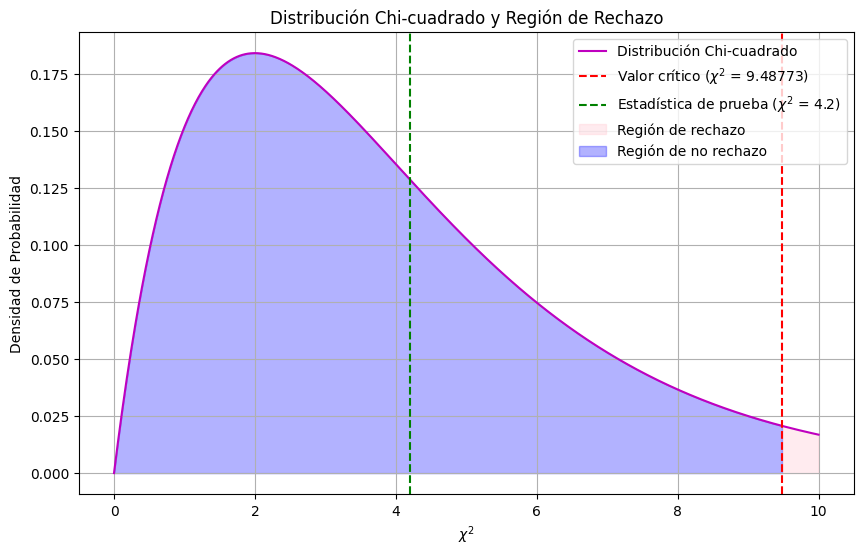

In [59]:
'''Ejercicio 1: Realice una prueba de bondad de ajuste con un nivel de aceptación del 95 %'''

from tabulate import tabulate #Para poder graficar los datos
import math
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#Definimos la lista de datos
lista= [0.8797, 0.3884, 0.6289, 0.875, 0.5999, 0.8589, 0.9996, 0.2415, 0.3808, 0.9606, 0.9848, 0.3469, 0.7977, 0.5844, 0.8147, 0.6431, 0.7387, 0.5613, 0.0318, 0.7401, 0.4557, 0.1592, 0.8536, 0.8846, 0.341, 0.1492, 0.8681, 0.5291, 0.3188, 0.5992, 0.917, 0.2204, 0.5991, 0.5461, 0.5739, 0.3254, 0.0856, 0.2258, 0.4603, 0.5027, 0.8376, 0.6235, 0.3681, 0.2088, 0.1525, 0.2006, 0.472, 0.4272, 0.636, 0.0954]

#1. Definición de las Hipótesis:
H_0=["Los números se distribuyen uniformemente con un valor de 10 en las categorías definidas"]
H_1=["Los números No siguen una distribución uniforme de 10 en las categorías definidas"]

#2. Nivel de significancia alpha
Nivel_significancia=int(input("Ingrese el nivel de aceptación:"))
Nivel_significancia=Nivel_significancia/100
alpha= round((1- Nivel_significancia),2) #Redondeamos el valor de alpha a 2 decimales

#3.- Calculamos los datos necesarios para el estadístico de pruba Chi-cuadrada (x^2)
'''
En este caso tenemos n=50, arbitrariamente elegimos k(categorías)=5
Nuestras 5 categorías serán: [(0-0.19), (0.20-0.39), (0.40-0.59), (0.60-0.79), (0-80,0-99)]
Asi, nuestra f_e=50/5=10 números por categoría. Para la f_o tomaremos los datos de la lista y los iremos clasificando en su respectiva categoría.

'''

n=len(lista)
#Definición del rango de las categorias
categorias = [(0.00, 0.20), (0.20, 0.40), (0.40, 0.60), (0.60, 0.80), (0.80, 1.00)]
k=len(categorias)

# Calculamos la frecuencia observada para cada categoría
frecuencia_observada = {categoria: sum(1 for numero in lista if categoria[0] <= numero < categoria[1]) for categoria in categorias}
frecuenica_esperada=n/k

# Preparar datos para la tabla
tabla_datos = []
for categoria, fo in frecuencia_observada.items():
  tabla_datos.append([f"{categoria[0]} - {categoria[1]}", frecuenica_esperada, fo])

# Calcular (FO-FE)^2 y ((FO-FE)^2)/FE y sumarlos
suma_fo_fe_sq = 0
suma_fo_fe_sq_div_fe = 0
for i, fila in enumerate(tabla_datos):
    fo_minus_fe_sq = (fila[2] - fila[1]) ** 2
    fo_minus_fe_sq_div_fe = fo_minus_fe_sq / fila[1]
    tabla_datos[i].extend([fo_minus_fe_sq, fo_minus_fe_sq_div_fe])
    suma_fo_fe_sq += fo_minus_fe_sq
    suma_fo_fe_sq_div_fe += fo_minus_fe_sq_div_fe

Estadistico_chi=suma_fo_fe_sq_div_fe
# Agregar una fila adicional para las sumas
tabla_datos.append(["Valor del estadístico χ2 ", "", "", "", Estadistico_chi])

# Imprimir tabla con las columnas adicionales y la fila de sumas
print("Tabla de resultados para calcular χ2 ")
print(tabulate(tabla_datos, headers=["Categorías", "FE", "FO", "(FO-FE)^2", "((FO-FE)^2)/FE"], tablefmt="grid"))

#4.	Formulamos la regla de decisión:
'''
Para saber el valor critico debemos conocer los grados de libertad (dl)
dl= k-1=4
Posteriormente utilizaremos las tablas de valores críticos de ji cuadrada
y buscaremos el valor para nuestro nivel de significancia, que es de 0.05 y éste será nuestro el valor crítico.

'''

#Definimos los grados de libertad
dl=k-1
# Calcular y mostrar los valores críticos de chi-cuadrado para los diferentes alphas
print("> Grados de Libertad:", dl)
print("> Nivel de significancia α :",alpha)
# Calcular y mostrar el valor crítico de chi-cuadrado para el alpha y df dados
Valor_critico = round(chi2.ppf(1 - alpha, dl),5)
print(f"> Valor Crítico de Chi-Cuadrado: {Valor_critico}")

#Comprobamos Hipótesis
'''
Entonces nuestra regla se decisión entonces se definirá de la siguiente manera:
	Rechazar H_0 si χ2>9.488
	No se rechaza H_0  si χ2≤9.488
'''

if Estadistico_chi <= Valor_critico:
  print("> Como H_0 <= Valor crítico, se acepta H_0")
  print("> H_0:",H_0)
else :
    print("> Como H_0 > Valor crítico, no se acepta H_0")
    print("> H_1",H_1)


#######Graficamos la distribución ######

# Calcular los valores para la gráfica
x = np.linspace(0, 10, 1000)  # Valores de chi-cuadrado
y = stats.chi2.pdf(x, dl)  # Densidad de probabilidad

# Graficar la distribución chi-cuadrado
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'm-', label='Distribución Chi-cuadrado')

# Marcar el valor crítico y la estadística de prueba
plt.axvline(Valor_critico, color='r', linestyle='--', label='Valor crítico ($\chi^2$ = {:.5f})'.format(Valor_critico))
plt.axvline(Estadistico_chi, color='g', linestyle='--', label=f'Estadística de prueba ($\chi^2$ = {Estadistico_chi})')


# Rellenar la región de rechazo (rosa)
plt.fill_between(x, 0, y, where=(x > Valor_critico), color='pink', alpha=0.3, label='Región de rechazo')

# Rellenar la región de no rechazo (morado)
plt.fill_between(x, 0, y, where=(x <= Valor_critico), color='blue', alpha=0.3, label='Región de no rechazo')

# Etiquetas y leyenda
plt.title('Distribución Chi-cuadrado y Región de Rechazo')
plt.xlabel('$\chi^2$')
plt.ylabel('Densidad de Probabilidad')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()




Ingrese el nivel de aceptación:90
Tabla de resultados para calcular χ2 
+--------------------------+------+------+-------------+------------------+
| Categorías               | FE   | FO   | (FO-FE)^2   |   ((FO-FE)^2)/FE |
+==========================+======+======+=============+==================+
| 0.01 - 0.21              | 20.0 | 20   | 0.0         |             0    |
+--------------------------+------+------+-------------+------------------+
| 0.21 - 0.41              | 20.0 | 19   | 1.0         |             0.05 |
+--------------------------+------+------+-------------+------------------+
| 0.41 - 0.61              | 20.0 | 21   | 1.0         |             0.05 |
+--------------------------+------+------+-------------+------------------+
| 0.61 - 0.81              | 20.0 | 22   | 4.0         |             0.2  |
+--------------------------+------+------+-------------+------------------+
| 0.81 - 1.1               | 20.0 | 18   | 4.0         |             0.2  |
+---------------

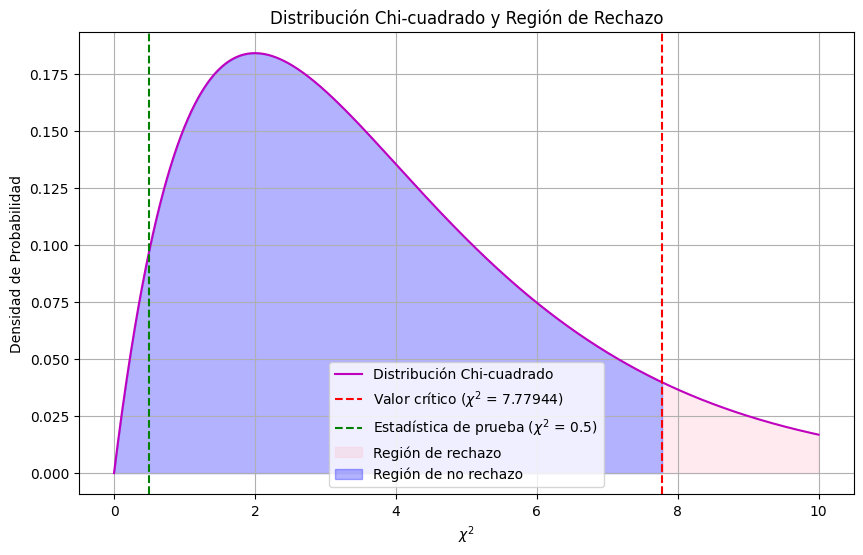

In [60]:
'''Ejercicio 2:Determine si la siguiente lista de 100 números de 2 dígitos tiene una distribución
uniforme con un nivel de aceptación de 90 %.'''
from tabulate import tabulate #Para poder graficar los datos
import math
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#Definimos la lista de datos
lista = [0.78, 0.98, 0.24, 0.73, 0.43, 0.16, 0.78, 0.47, 0.18, 0.55,0.04, 0.29, 0.68, 0.77, 0.16, 0.03, 0.79, 0.22, 0.37, 0.80,0.96, 0.26, 0.91, 0.55, 0.75, 0.55, 0.64, 0.39, 0.53, 0.45,0.61, 0.14, 0.38, 0.12, 0.40, 0.74, 0.78, 0.98, 0.27, 0.60,0.43, 0.67, 0.62, 0.32, 0.53, 0.54, 0.24, 0.29, 0.18, 0.08,0.82, 0.94, 0.19, 0.98, 0.41, 1.00, 0.74, 0.92, 0.14, 0.43,0.83, 0.88, 0.18, 0.21, 0.50, 0.13, 0.43, 0.69, 0.08, 0.12,0.22, 0.50, 0.16, 0.11, 0.18, 0.89, 0.80, 0.42, 0.29, 0.87,0.83, 0.79, 0.65, 0.28, 0.78, 0.49, 0.36, 0.86, 0.87, 0.64,0.51, 0.07, 0.18, 0.94, 0.50, 0.22, 0.66, 0.91, 0.48, 0.24]

#1. Definición de las Hipótesis:
H_0=["Los números se distribuyen uniformemente con un valor de 20 en las categorías definidas"]
H_1=["Los números No siguen una distribución uniforme de 20 en las categorías definidas"]

#2. Nivel de significancia alpha
Nivel_significancia=int(input("Ingrese el nivel de aceptación:"))
Nivel_significancia=Nivel_significancia/100
alpha= round((1- Nivel_significancia),2) #Redondeamos el valor de alpha a 2 decimales

#3.- Calculamos los datos necesarios para el estadístico de pruba Chi-cuadrada (x^2)
'''
En este caso tenemos n=100, arbitrariamente elegimos k(categorías)=5
Nuestras 5 categorías serán: [(0.01-0.20), (0.21-0.40), (0.41-0.60), (0.61-0.79), (0.81-1.00)]
Asi, nuestra f_e=100/5=20 números por categoría. Para la f_o tomaremos los datos de la lista y los iremos clasificando en su respectiva categoría.

'''

n=len(lista)
#Definición del rango de las categorias
categorias = [(0.01, 0.21), (0.21, 0.41), (0.41, 0.61), (0.61, 0.81), (0.81, 1.10)]
k=len(categorias)

# Calculamos la frecuencia observada para cada categoría
frecuencia_observada = {categoria: sum(1 for numero in lista if categoria[0] <= numero < categoria[1]) for categoria in categorias}
frecuenica_esperada=n/k

# Preparar datos para la tabla
tabla_datos = []
for categoria, fo in frecuencia_observada.items():
  tabla_datos.append([f"{categoria[0]} - {categoria[1]}", frecuenica_esperada, fo])

# Calcular (FO-FE)^2 y ((FO-FE)^2)/FE y sumarlos
suma_fo_fe_sq = 0
suma_fo_fe_sq_div_fe = 0
for i, fila in enumerate(tabla_datos):
    fo_minus_fe_sq = (fila[2] - fila[1]) ** 2
    fo_minus_fe_sq_div_fe = fo_minus_fe_sq / fila[1]
    tabla_datos[i].extend([fo_minus_fe_sq, fo_minus_fe_sq_div_fe])
    suma_fo_fe_sq += fo_minus_fe_sq
    suma_fo_fe_sq_div_fe += fo_minus_fe_sq_div_fe

Estadistico_chi=suma_fo_fe_sq_div_fe
# Agregar una fila adicional para las sumas
tabla_datos.append(["Valor del estadístico χ2 ", "", "", "", Estadistico_chi])

# Imprimir tabla con las columnas adicionales y la fila de sumas
print("Tabla de resultados para calcular χ2 ")
print(tabulate(tabla_datos, headers=["Categorías", "FE", "FO", "(FO-FE)^2", "((FO-FE)^2)/FE"], tablefmt="grid"))

#4.	Formulamos la regla de decisión:
'''
Para saber el valor critico debemos conocer los grados de libertad (dl)
dl= k-1=4
Posteriormente utilizaremos las tablas de valores críticos de ji cuadrada
y buscaremos el valor para nuestro nivel de significancia, que es de 0.05 y éste será nuestro el valor crítico.

'''

#Definimos los grados de libertad
dl=k-1
# Calcular y mostrar los valores críticos de chi-cuadrado para los diferentes alphas
print("> Grados de Libertad:", dl)
print("> Nivel de significancia α :",alpha)
# Calcular y mostrar el valor crítico de chi-cuadrado para el alpha y df dados
Valor_critico = round(chi2.ppf(1 - alpha, dl),5)
print(f"> Valor Crítico de Chi-Cuadrado: {Valor_critico}")

#Comprobamos Hipótesis
'''
Entonces nuestra regla se decisión entonces se definirá de la siguiente manera:
	Rechazar H_0 si χ2>9.488
	No se rechaza H_0  si χ2≤9.488
'''

if Estadistico_chi <= Valor_critico:
  print("> Como H_0 <= Valor crítico, se acepta H_0")
  print("> H_0:",H_0)
else :
    print("> Como H_0 > Valor crítico, no se acepta H_0")
    print("> H_1",H_1)


#######Graficamos la distribución ######

# Calcular los valores para la gráfica
x = np.linspace(0, 10, 1000)  # Valores de chi-cuadrado
y = stats.chi2.pdf(x, dl)  # Densidad de probabilidad

# Graficar la distribución chi-cuadrado
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'm-', label='Distribución Chi-cuadrado')

# Marcar el valor crítico y la estadística de prueba
plt.axvline(Valor_critico, color='r', linestyle='--', label='Valor crítico ($\chi^2$ = {:.5f})'.format(Valor_critico))
plt.axvline(Estadistico_chi, color='g', linestyle='--', label=f'Estadística de prueba ($\chi^2$ = {Estadistico_chi})')


# Rellenar la región de rechazo (rosa)
plt.fill_between(x, 0, y, where=(x > Valor_critico), color='pink', alpha=0.3, label='Región de rechazo')

# Rellenar la región de no rechazo (morado)
plt.fill_between(x, 0, y, where=(x <= Valor_critico), color='blue', alpha=0.3, label='Región de no rechazo')

# Etiquetas y leyenda
plt.title('Distribución Chi-cuadrado y Región de Rechazo')
plt.xlabel('$\chi^2$')
plt.ylabel('Densidad de Probabilidad')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()